# Matrix multiplication test

In [1]:
import time
import cupy as cp
import numpy as np
import torch
import matplotlib.pyplot as plt

## Define test functions

In [2]:
def numpy_test(array_size, repeat, dtype=np.float32):
    a = np.random.rand(array_size, array_size)
    a = np.array(a, dtype=dtype)
    numpy_elapsed_time_list = []
    for _ in range(repeat):
        t0 = time.time()
        np.dot(a, a)
        numpy_elapsed_time_list.append(time.time() - t0)

    return numpy_elapsed_time_list

In [3]:
def cupy_test(array_size, repeat, dtype=cp.float32):
    b = cp.random.rand(array_size, array_size, dtype=dtype) # float64 data are significantly slower
    cupy_elapsed_time_list = []
    for _ in range(repeat):
        t0 = time.time()
        cp.dot(b, b)
        cp.cuda.get_current_stream().synchronize()
        cupy_elapsed_time_list.append(time.time() - t0)

    return cupy_elapsed_time_list

In [4]:
def torch_test(array_size, repeat, dtype=torch.float32):
    c = torch.rand(array_size, array_size, device='cuda', dtype=dtype) # float64 data are similar in speed
    torch_elapsed_time_list = []
    for _ in range(repeat):
        t0 = time.time()
        torch.matmul(c, c)

        # use synchronize to accurately time cuda
        # https://www.speechmatics.com/company/articles-and-news/timing-operations-in-pytorch
        torch.cuda.synchronize()

        torch_elapsed_time_list.append(time.time() - t0)

    return torch_elapsed_time_list

## Run tests

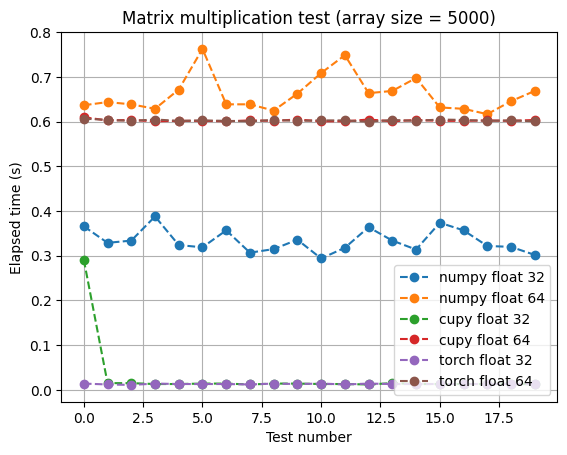

In [9]:
array_size = 5000
repeat = 20

plt.plot(numpy_test(array_size=array_size, repeat=repeat, dtype=np.float32), 'o--', label='numpy float 32')
plt.plot(numpy_test(array_size=array_size, repeat=repeat, dtype=np.float64), 'o--', label='numpy float 64')
plt.plot(cupy_test(array_size=array_size, repeat=repeat, dtype=cp.float32), 'o--', label='cupy float 32')
plt.plot(cupy_test(array_size=array_size, repeat=repeat, dtype=cp.float64), 'o--', label='cupy float 64')
plt.plot(torch_test(array_size=array_size, repeat=repeat, dtype=torch.float32), 'o--', label='torch float 32')
plt.plot(torch_test(array_size=array_size, repeat=repeat, dtype=torch.float64), 'o--', label='torch float 64')

plt.title(f'Matrix multiplication test (array size = {array_size})')
plt.xlabel('Test number')
plt.ylabel('Elapsed time (s)')
plt.grid()
plt.legend(loc='lower right')
plt.show()